## 00e: Solving Linear Regression With Multiple Parameters

We saw how to solve for the optimal $\hat\theta_1$ that minimizes the SSE on the observed dataset, provided we already know the true $\theta_0$. Likewise, we could find the best $\hat\theta_0$ if we already knew the true $\theta_1$.

**Run this for Latex macros.**

\\[
\newcommand{\fpartial}[2]{\frac{\partial #1}{\partial #2}}
\\]

Note that I can write $E(\theta_0, \theta_1)$ as a quadratic function in $\theta_0$.

\\[
\begin{align}
E(\theta_0, \theta_1)
&=
\sum_{i = 0}^N ((\theta_0 + \theta_1 x_i) - y_i)^2
\\
&=
\sum_{i = 0}^N (\theta_0 + \theta_1 x_i)^2 + 2(\theta_0 + \theta_1 x_i)(-y_i) + (-y_i)^2
\\
&=
\sum_{i = 0}^N
    \theta_0^2
    + 2 \theta_0\theta_1 x_i
    + \theta_1^2 x_i^2
    - 2 \theta_0 y_i
    - 2 \theta_1 x_i y_i
    + y_i^2
\\
&=
\sum_{i = 0}^N
    \theta_0^2
    - 2 \theta_0 y_i
    + 2 \theta_0\theta_1 x_i
    + \left(
        \theta_1^2 x_i^2
        - 2 \theta_1 x_i y_i
        + y_i^2
    \right)
\\
&=
\sum_{i = 0}^N
    \theta_0^2
    + 2 \left(
        \theta_1 x_i
        - y_i
    \right) \theta_0
    + \left(
        \theta_1^2 x_i^2
        - 2 \theta_1 x_i y_i
        + y_i^2
    \right)
\\
&=
\left(
    \sum_{i = 0}^N
        1
\right)
\theta_0^2
+
2 \left(
    \sum_{i = 0}^N
        \theta_1 x_i
        - y_i
\right) \theta_0
+ \left(
    \sum_{i = 0}^N
        \theta_1^2 x_i^2
        - 2 \theta_1 x_i y_i
        + y_i^2
\right)
\end{align}
\\]

We can find the derivative with respect to $\theta_0$ in the normal way.

\\[
\begin{align}
\fpartial{E}{\theta_0}
    (\theta_0, \theta_1)
&=
\fpartial{}{\theta_0}
\left(
    \left(
        \sum_{i = 0}^N
            1
    \right)
    \theta_0^2
    +
    2 \left(
        \sum_{i = 0}^N
            \theta_1 x_i
            - y_i
    \right) \theta_0
    + \left(
        \sum_{i = 0}^N
            \theta_1^2 x_i^2
            - 2 \theta_1 x_i y_i
            + y_i^2
    \right)
\right)
\\
&=
2 \left(
    \sum_{i = 0}^N
        1
\right)
\theta_0
+
2 \left(
    \sum_{i = 0}^N
        \theta_1 x_i
        - y_i
\right)
\end{align}
\\]

I won't bother to show you how to optimize $\hat\theta_0$ if we already know $\theta_1 = 5.0$. That would be boring, since we already how to do it in the other direction.

Instead, let's try to optimize and find both $\theta_0, \theta_1$ simultaneously. Before we begin, let's (1) generate our dataset and (2) graph the error *surface*, which is a three dimensional plot. The dimensions are $\theta_0, \theta_1, E(\theta_0, \theta_1)$.

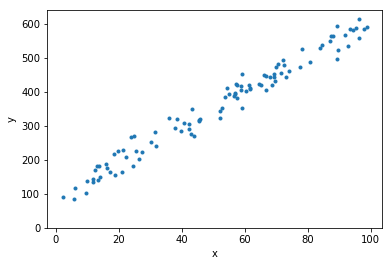

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# So we generate the same data each time!
np.random.seed(0)

class Dataset:
    NOISE_STDDEV = 25
    NUM_SAMPLES = 100
    THETA0 = 100.0
    THETA1 = 5.0

    @classmethod
    def generate_data(cls):
        xs = []
        ys = []
        noises = []
        for _ in range(cls.NUM_SAMPLES):
            # Sample a random x value between 0 and 100.
            x_observation = np.random.uniform(low = 0.0, high = 100.0)
            y_observation = cls.THETA0 + (x_observation * cls.THETA1)
            # Add some "noise" to y
            noise = np.random.normal(scale = cls.NOISE_STDDEV)
            y_observation += noise

            xs.append(x_observation)
            ys.append(y_observation)
            noises.append(noise)

        # Return numpy arrays of the data values.
        return np.array(xs), np.array(ys), np.array(noises)
    
    @classmethod
    def generate(cls):
        x, y, noises = cls.generate_data()
        return cls(x, y)

    def __init__(self, x, y):
        self.x, self.y = x, y

    def plot(self, axes):
        axes.plot(self.x, self.y, ".")
        axes.set_ylabel("y")
        axes.set_xlabel("x")
        # Even if all data is positive, show y axis
        axes.set_ylim(ymin = np.min((np.min(self.y), 0)))

        return axes

DATASET = Dataset.generate()

DATASET.plot(plt.figure().add_subplot(111))

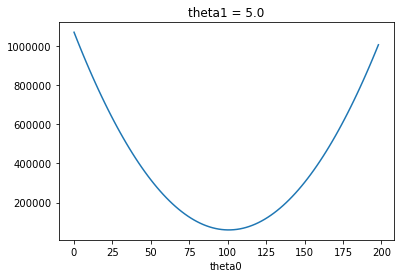

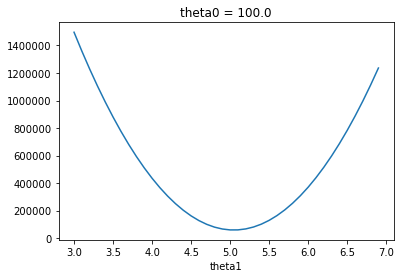

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def calculate_sse(x, y, theta0, theta1):
    return np.sum(
        ((theta0 + theta1 * x) - y) ** 2
    )

def calculate_many_sses(x, y, theta0_values, theta1_values):
    # There is a way to do this simply with vectors, but I won't right now.
    error_values = np.zeros(shape = (
        len(theta0_values),
        len(theta1_values)
    ))

    for i, theta0_value in enumerate(theta0_values):
        for j, theta1_value in enumerate(theta1_values):
            error_values[i, j] = (
                calculate_sse(x, y, theta0_value, theta1_value)
            )
        
    return error_values

def plot_theta0_error_graph(dataset, theta0_values, theta1_value):
    error_values = calculate_many_sses(dataset.x, dataset.y, theta0_values, [theta1_value])
    # collapse matrix with one column to a one-dimensional vector.
    error_values = error_values.reshape(len(theta0_values))

    plt.plot(
        theta0_values,
        error_values,
        "-"
    )
    plt.title(f"theta1 = {theta1_value}")
    plt.xlabel("theta0")

def plot_theta1_error_graph(dataset, theta0_value, theta1_values):
    error_values = calculate_many_sses(dataset.x, dataset.y, [theta0_value], theta1_values)
    # collapse matrix with one row to a one-dimensional vector.
    error_values = error_values.reshape(len(theta1_values))

    plt.plot(
        theta1_values,
        error_values,
        "-"
    )
    plt.title(f"theta0 = {theta0_value}")
    plt.xlabel("theta1")

plot_theta0_error_graph(
    DATASET,
    theta0_values = np.arange(0, 200, 2.0),
    theta1_value = 5.0,
)
plt.show()
plot_theta1_error_graph(
    DATASET,
    theta0_value = 100.0,
    theta1_values = np.arange(3, 7, 0.1)
)
plt.show()

Okay, this shows us that, seen as a function of a constant $\theta_0$ (or $\theta_1$), the error function is a parabola in $\theta_1$ (or $\theta_0$).

Let's see the three-dimensional version!

In order to make things easier to see, I am going to change the $x$ and $y$ values by dividing them by their maximum values. This basically just changes the *units* of the graph. We can always undo this change later.

(100, 40)


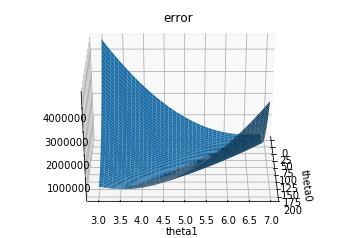

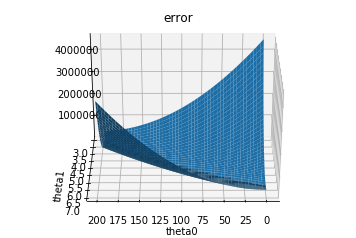

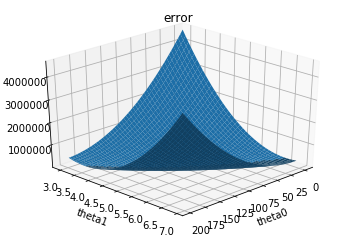

In [3]:
from mpl_toolkits.mplot3d import Axes3D

def plot_error_surface(angle, theta0_values, theta1_values, errors):
    figure = plt.figure()
    axes = figure.add_subplot(111, projection = "3d")
    axes.plot_surface(
        # plot surface cares about the shape of these vectors...
        theta0_values.reshape((len(theta0_values), 1)),
        theta1_values.reshape((1, len(theta1_values))),
        errors
    )
    plt.xlabel("theta0")
    plt.ylabel("theta1")
    plt.title("error")

    axes.view_init(azim = angle)

theta0_values = np.arange(0, 200, 2.0)
theta1_values = np.arange(3, 7, 0.1)
errors = calculate_many_sses(
    DATASET.x, DATASET.y, theta0_values, theta1_values
)
print(errors.shape)

for angle in [0, 90, 45]:
    plot_error_surface(
        angle,
        theta0_values,
        theta1_values,
        errors
    )


The two dimensional plots show "slices" of this three dimensional error surface. A slice along either the $\theta_0$ or the $\theta_1$ dimension is a polynomial function.

The three-dimensional surface is difficult to read when we can only see it in two dimensions really. For that reason, let's use a *contour plot*.

(100, 40)


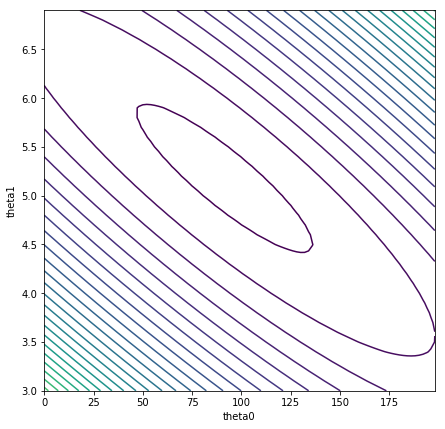

In [4]:
def plot_contours(dataset, theta0_values, theta1_values, errors, contour_levels):
    figure = plt.figure(figsize = (7, 7))
    axes = figure.add_subplot(111)

    contours = axes.contour(
        theta0_values,
        theta1_values,
        # For some reason, axes.contours wants errors matrix in theta1_values x theta0_values format.
        errors.T,
        levels = contour_levels
    )
    axes.set_xlabel("theta0")
    axes.set_ylabel("theta1")

theta0_values = np.arange(0, 200, 2.0)
theta1_values = np.arange(3, 7, 0.1)
errors = calculate_many_sses(
    DATASET.x, DATASET.y, theta0_values, theta1_values
)
print(errors.shape)

plot_contours(
    DATASET,
    theta0_values,
    theta1_values,
    errors,
    contour_levels = np.arange(1, 64, 2) * 1e5,
)

To optimize both $\theta_0, \theta_1$, let's just start at a random starting point and try to do gradient descent "simultaneously." That is:

\\[
\theta_0^\text{OLD}
\mapsto
\theta_0^\text{OLD} - \eta \fpartial{E}{\theta_0}(\theta_0^\text{OLD}, \theta_1^\text{OLD})
\\
\theta_1^\text{OLD}
\mapsto
\theta_1^\text{OLD} - \eta \fpartial{E}{\theta_1}(\theta_0^\text{OLD}, \theta_1^\text{OLD})
\\]

Where $\eta$ is the learning rate. This basically just assumes that if we have a good update for $\theta_0$, and a good update for $\theta_1$, then the combined update is also good. Let's see how it works out!

(100, 40)


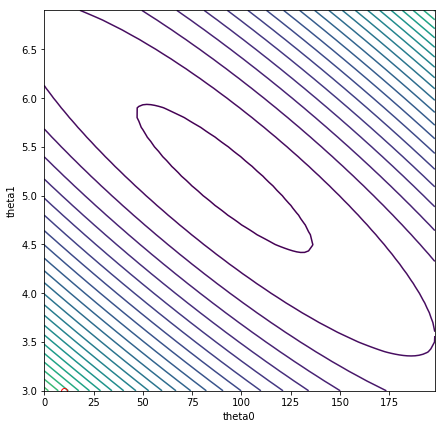

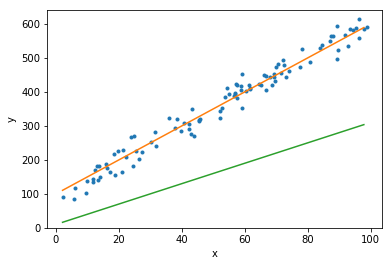

theta0_estimate: 10.0
theta1_estimate: 3.0
error_deriv_wrt_theta0: -38905.53113704332
error_deriv_wrt_theta1: -2339133.261668034
Δ theta0: 0.015562212454817327
Δ theta1: 0.9356533046672135


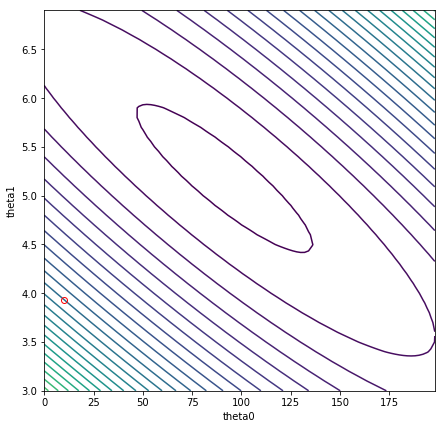

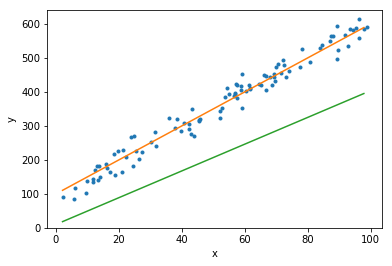

theta0_estimate: 10.015562212454817
theta1_estimate: 3.9356533046672135
error_deriv_wrt_theta0: -29180.40909940627
error_deriv_wrt_theta1: -1697300.6612031772
Δ theta0: 0.011672163639762508
Δ theta1: 0.6789202644812709


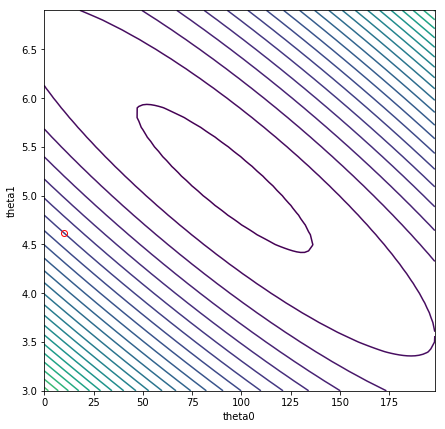

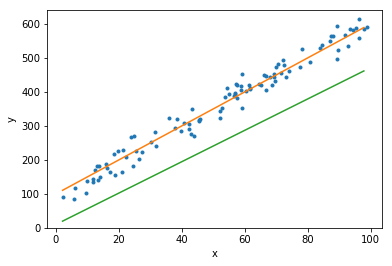

theta0_estimate: 10.02723437609458
theta1_estimate: 4.614573569148485
error_deriv_wrt_theta0: -22123.678243663868
error_deriv_wrt_theta1: -1231575.962153121
Δ theta0: 0.008849471297465546
Δ theta1: 0.4926303848612483


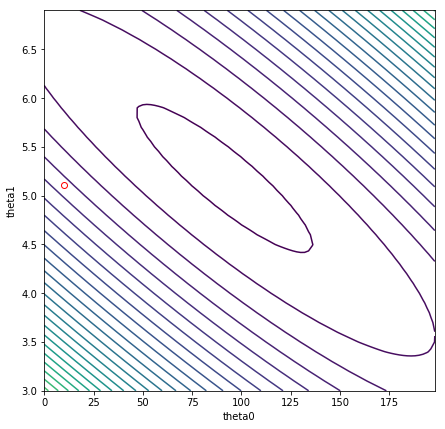

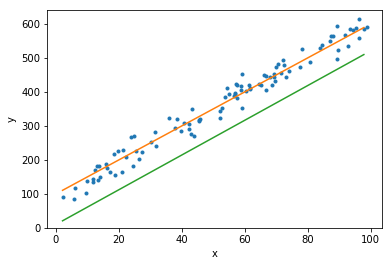

theta0_estimate: 10.036083847392044
theta1_estimate: 5.107203954009734
error_deriv_wrt_theta0: -17003.177613787502
error_deriv_wrt_theta1: -893638.1648130929
Δ theta0: 0.006801271045515001
Δ theta1: 0.35745526592523713


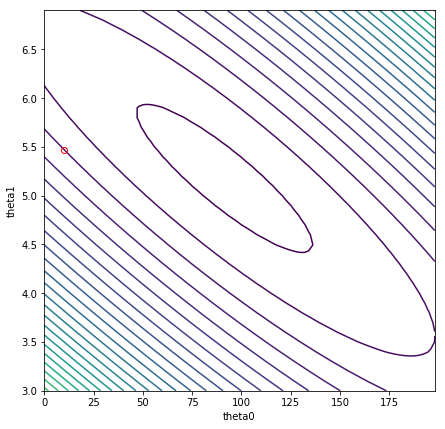

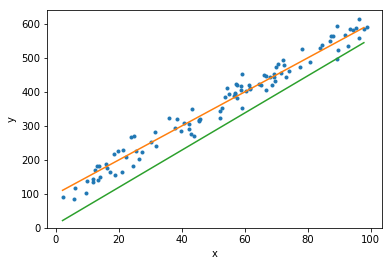

theta0_estimate: 10.042885118437558
theta1_estimate: 5.464659219934971
error_deriv_wrt_theta0: -13287.638712609703
error_deriv_wrt_theta1: -648424.7263318175
Δ theta0: 0.005315055485043881
Δ theta1: 0.25936989053272697


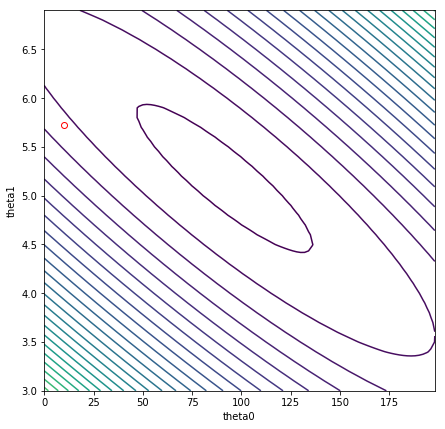

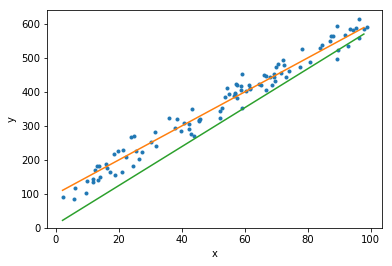

theta0_estimate: 10.048200173922602
theta1_estimate: 5.724029110467698
error_deriv_wrt_theta0: -10591.564042949667
error_deriv_wrt_theta1: -470493.66664454946
Δ theta0: 0.004236625617179867
Δ theta1: 0.18819746665781978


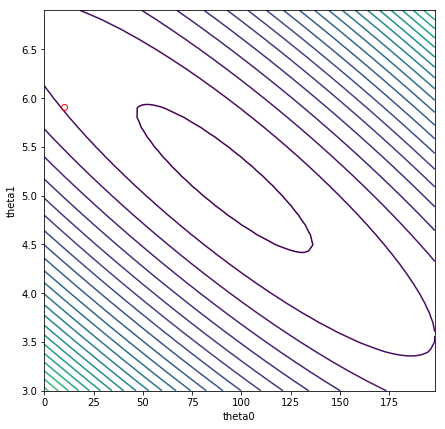

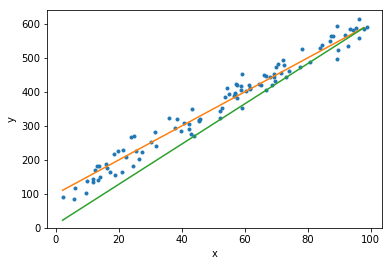

theta0_estimate: 10.052436799539782
theta1_estimate: 5.912226577125518
error_deriv_wrt_theta0: -8635.230035416374
error_deriv_wrt_theta1: -341383.8503920981
Δ theta0: 0.0034540920141665496
Δ theta1: 0.1365535401568392


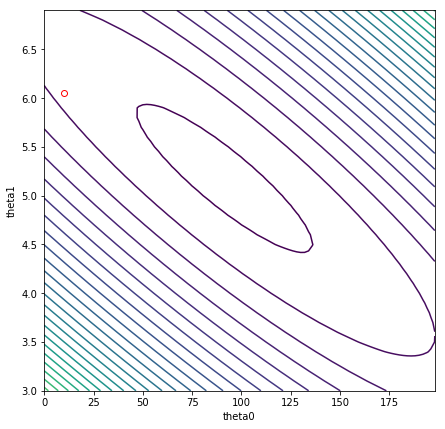

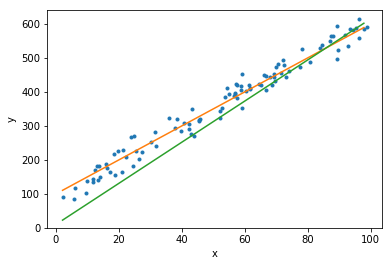

theta0_estimate: 10.055890891553949
theta1_estimate: 6.048780117282357
error_deriv_wrt_theta0: -7215.664489554377
error_deriv_wrt_theta1: -247699.56238707574
Δ theta0: 0.002886265795821751
Δ theta1: 0.0990798249548303


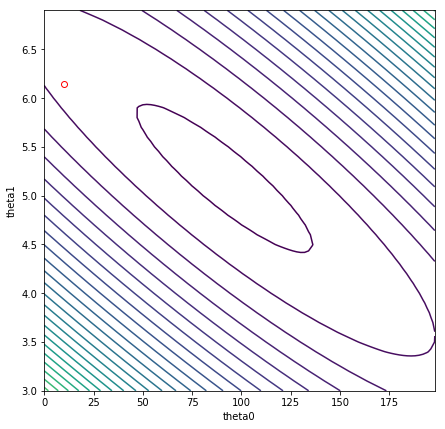

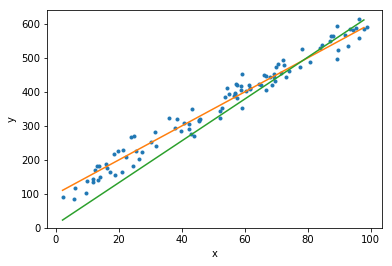

theta0_estimate: 10.05877715734977
theta1_estimate: 6.147859942237187
error_deriv_wrt_theta0: -6185.587309348133
error_deriv_wrt_theta1: -179720.6428511059
Δ theta0: 0.002474234923739253
Δ theta1: 0.07188825714044235


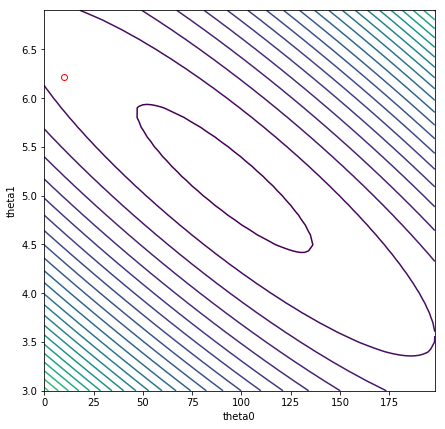

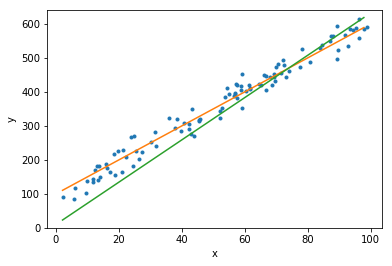

theta0_estimate: 10.061251392273508
theta1_estimate: 6.21974819937763
error_deriv_wrt_theta0: -5438.129541149429
error_deriv_wrt_theta1: -130393.97779994737
Δ theta0: 0.0021752518164597718
Δ theta1: 0.05215759111997895


In [22]:
def error_deriv_wrt_theta0(dataset, theta0, theta1):
    return (
        2 * len(dataset.x) * theta0
        + 2 * np.sum(theta1 * dataset.x - dataset.y)
    )
def error_deriv_wrt_theta1(dataset, theta0, theta1):
    return (
        2 * np.sum(dataset.x * dataset.x) * theta1
        + np.sum(2 * (theta0 * dataset.x - dataset.x * dataset.y))
    )

def improve(dataset, theta0, theta1, learning_rate):
    error_deriv0 = error_deriv_wrt_theta0(dataset, theta0_estimate, theta1_estimate)
    error_deriv1 = error_deriv_wrt_theta1(dataset, theta0_estimate, theta1_estimate)
    print(
        f"error_deriv_wrt_theta0: {error_deriv0}"
    )
    print(
        f"error_deriv_wrt_theta1: {error_deriv1}"
    )
    
    print(
        f"Δ theta0: {-learning_rate * error_deriv0}"
    )
    print(
        f"Δ theta1: {-learning_rate * error_deriv1}"
    )

    return (
        theta0 - learning_rate * error_deriv0,
        theta1 - learning_rate * error_deriv1
    )

def plot_model(dataset, theta0, theta1):
    x_range = np.arange(
        np.min(dataset.x),
        np.max(dataset.x),
        (np.max(dataset.x) - np.min(dataset.x)) / 100
    )
    y_estimate = theta0 + theta1 * x_range
    plt.plot(x_range, y_estimate, "-")

def run_gradient_descent_iteration(
        dataset,
        theta0_values,
        theta1_values,
        errors,
        contour_levels,
        learning_rate,
    ):
    plot_contours(
        dataset,
        theta0_values,
        theta1_values,
        errors,
        contour_levels
    )
    
    plt.plot(
        theta0_estimate,
        theta1_estimate,
        'o',
        color = 'red',
        markerfacecolor = 'none',
    )
    plt.show()
    
    dataset.plot(plt.figure().add_subplot(111))
    # Correct model.
    plot_model(dataset, 100, 5.0)
    # Estimated model
    plot_model(dataset, theta0_estimate, theta1_estimate)
    plt.show()
    
    print(f"theta0_estimate: {theta0_estimate}")
    print(f"theta1_estimate: {theta1_estimate}")

    return improve(dataset, theta0_estimate, theta1_estimate, learning_rate)    

LEARNING_RATE = 4e-7
contour_levels = np.arange(1, 64, 2) * 1e5
theta0_values = np.arange(0, 200, 2.0)
theta1_values = np.arange(3, 7, 0.1)
errors = calculate_many_sses(
    DATASET.x, DATASET.y, theta0_values, theta1_values
)
print(errors.shape)

theta0_estimate, theta1_estimate = 10.0, 3.0
for _ in range(10):
    theta0_estimate, theta1_estimate = run_gradient_descent_iteration(
        DATASET,
        theta0_values,
        theta1_values,
        errors,
        contour_levels,
        LEARNING_RATE
    )

Well, that stunk. Our updates to $\theta_1$ are of a pretty good size, but our updates to $\theta_0$ are very small. The problem is that the derivative of the error with respect to $\theta_0$ has a much smaller magnitude than the error derivative with respect to $\theta_1$.

Why? This is because a change of one unit isn't very large in terms of the intercept $\theta_0$ because the true $\theta_0$ is actually 100. On the other hand, a change of one unit is very great for $\theta_1$, because the true $\theta_1$ is only 5.

There are many potential solutions to this problem. One of the best places to start is to make sure that the $x$ and $y$ values are in the same range.

(40, 200)
REVERSED ESTIMATE:
(238.38827989858754, 0.54742092671691134)


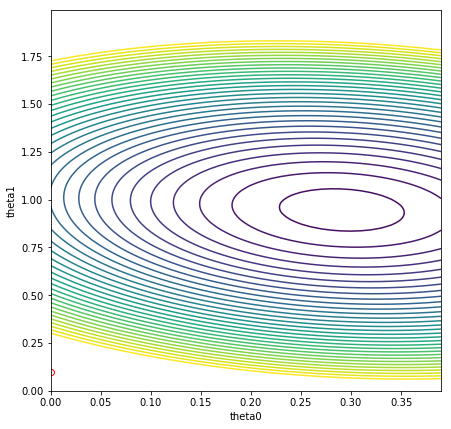

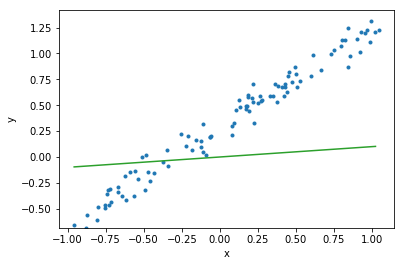

theta0_estimate: 0.0
theta1_estimate: 0.1
error_deriv_wrt_theta0: -70.64316842395657
error_deriv_wrt_theta1: -57.94426354786844
Δ theta0: 0.2825726736958263
Δ theta1: 0.23177705419147376
REVERSED ESTIMATE:
(251.84281363194947, 1.8162170246890348)


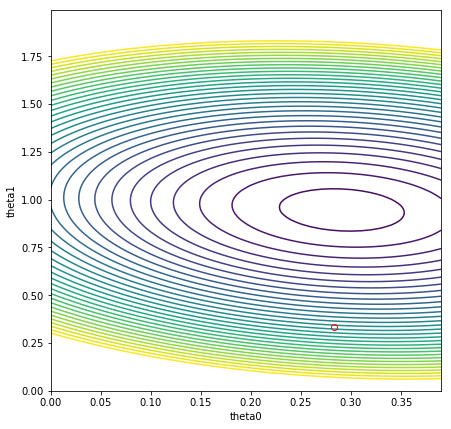

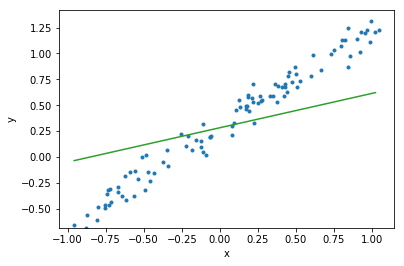

theta0_estimate: 0.2825726736958263
theta1_estimate: 0.33177705419147374
error_deriv_wrt_theta0: -10.71142096842054
error_deriv_wrt_theta1: -39.074849241479455
Δ theta0: 0.042845683873682164
Δ theta1: 0.15629939696591783
REVERSED ESTIMATE:
(221.79166306287621, 2.6718326320128059)


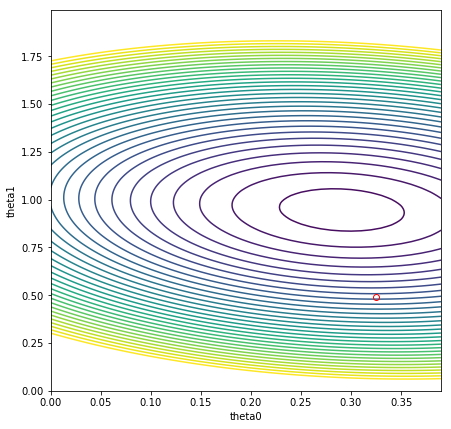

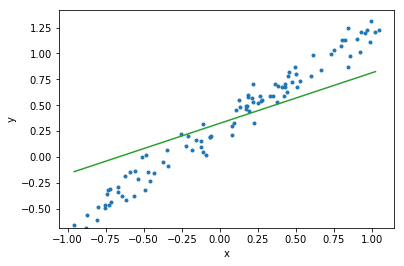

theta0_estimate: 0.32541835756950843
theta1_estimate: 0.48807645115739157
error_deriv_wrt_theta0: 0.1621211700659586
error_deriv_wrt_theta1: -28.52795141944527
Δ theta0: -0.0006484846802638345
Δ theta1: 0.11411180567778108
REVERSED ESTIMATE:
(191.39443170830202, 3.2965045361475158)


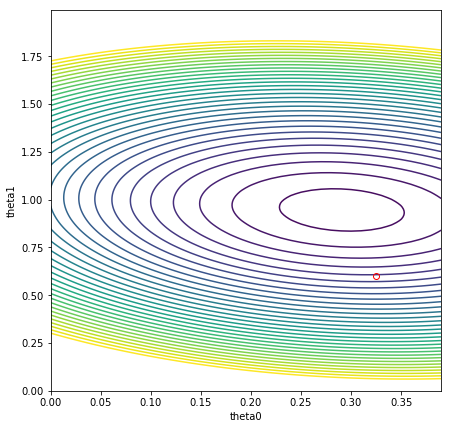

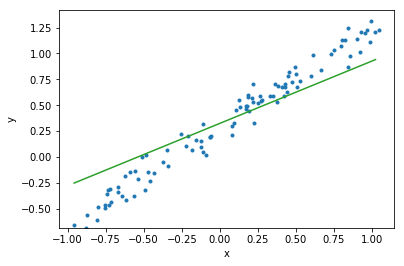

theta0_estimate: 0.3247698728892446
theta1_estimate: 0.6021882568351726
error_deriv_wrt_theta0: 1.7148354408102264
error_deriv_wrt_theta1: -21.29857532191437
Δ theta0: -0.006859341763240906
Δ theta1: 0.08519430128765748
REVERSED ESTIMATE:
(167.01164323574395, 3.7628759697664083)


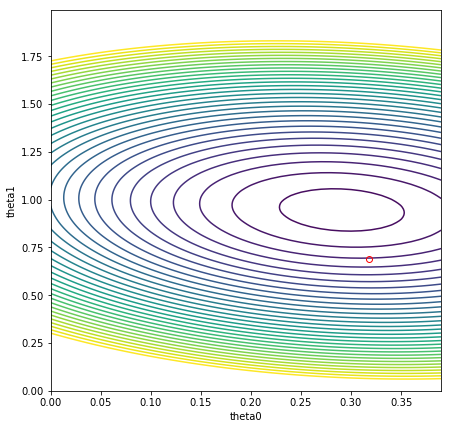

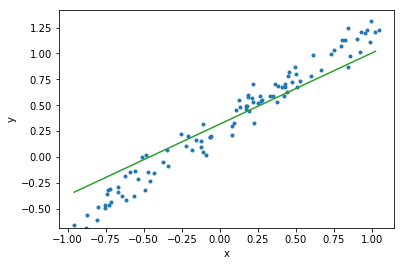

theta0_estimate: 0.31791053112600365
theta1_estimate: 0.6873825581228301
error_deriv_wrt_theta0: 1.5990321060650103
error_deriv_wrt_theta1: -15.995215627900969
Δ theta0: -0.006396128424260041
Δ theta1: 0.06398086251160387
REVERSED ESTIMATE:
(148.37047677614498, 4.1131206002489025)


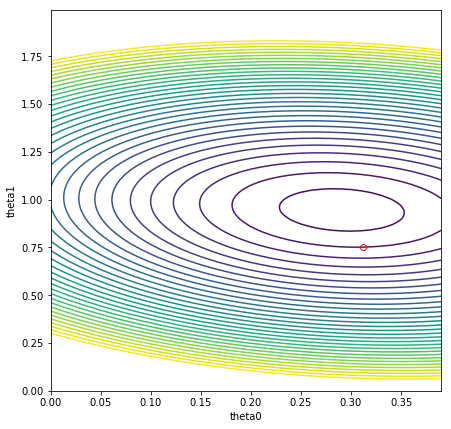

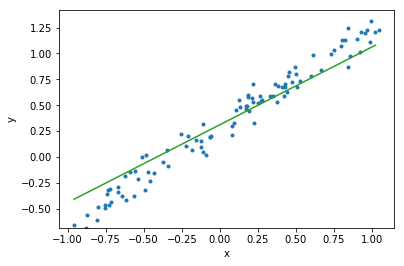

theta0_estimate: 0.31151440270174363
theta1_estimate: 0.751363420634434
error_deriv_wrt_theta0: 1.2631103981390623
error_deriv_wrt_theta1: -12.03074836274343
Δ theta0: -0.005052441592556249
Δ theta1: 0.048122993450973726
REVERSED ESTIMATE:
(134.28558733960483, 4.3765559369621414)


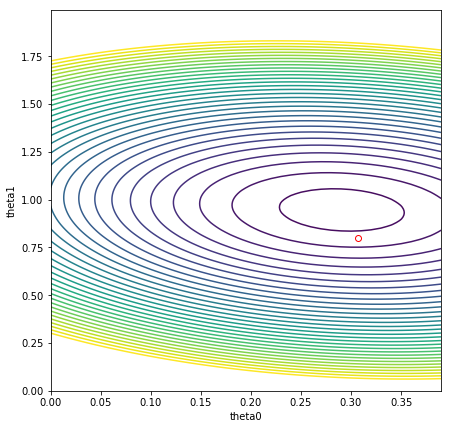

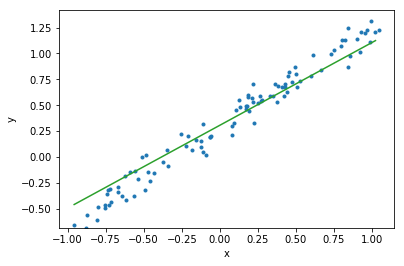

theta0_estimate: 0.3064619611091874
theta1_estimate: 0.7994864140854077
error_deriv_wrt_theta0: 0.9621250360103843
error_deriv_wrt_theta1: -9.052449719423542
Δ theta0: -0.0038485001440415373
Δ theta1: 0.03620979887769417
REVERSED ESTIMATE:
(123.67511067354387, 4.5747759535407448)


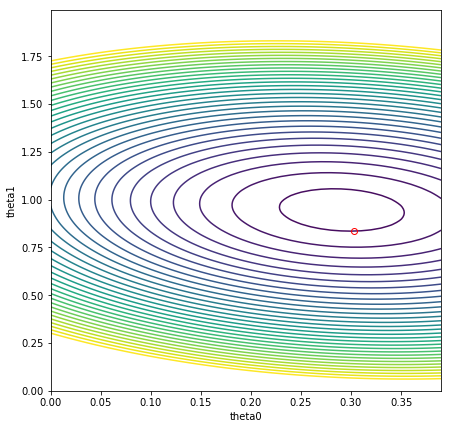

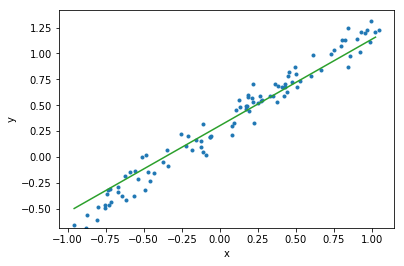

theta0_estimate: 0.30261346096514585
theta1_estimate: 0.8356962129631018
error_deriv_wrt_theta0: 0.7262853826983857
error_deriv_wrt_theta1: -6.8121408093368245
Δ theta0: -0.0029051415307935428
Δ theta1: 0.027248563237347298
REVERSED ESTIMATE:
(115.68812199326953, 4.723940290931675)


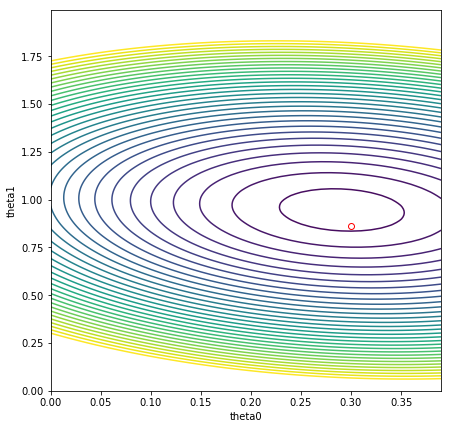

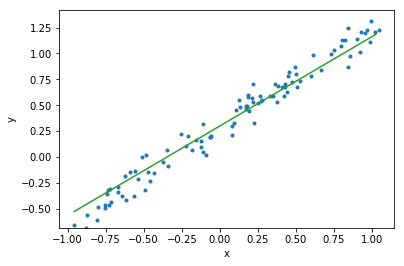

theta0_estimate: 0.29970831943435233
theta1_estimate: 0.8629447762004491
error_deriv_wrt_theta0: 0.5469971759740773
error_deriv_wrt_theta1: -5.126399441484772
Δ theta0: -0.002187988703896309
Δ theta1: 0.020505597765939087
REVERSED ESTIMATE:
(109.67713861185403, 4.8361922242508211)


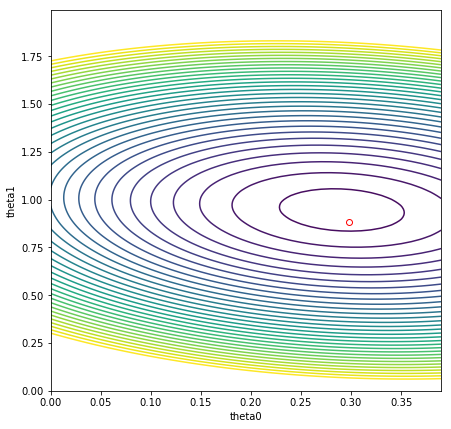

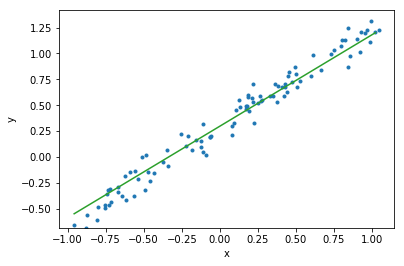

theta0_estimate: 0.29752033073045603
theta1_estimate: 0.8834503739663881
error_deriv_wrt_theta0: 0.411724398668845
error_deriv_wrt_theta1: -3.8578397697983036
Δ theta0: -0.0016468975946753802
Δ theta1: 0.015431359079193215


In [44]:
x_range = np.max(DATASET.x) - np.min(DATASET.x)
y_range = np.max(DATASET.y) - np.min(DATASET.y)

NORMALIZED_DATASET = Dataset(
    2 * (DATASET.x / x_range) - 1,
    2 * (DATASET.y / y_range) - 1,
)

def reverse_normalization(theta0, theta1):
    return (
        (theta0 + 1 - theta1) * (y_range / 2),
        theta1 * (y_range / 2) * (2 / x_range)
    )

LEARNING_RATE = 4e-3
contour_levels = np.arange(1, 64, 2) * 4e-1
theta0_values = np.arange(0, 0.4, 0.01)
theta1_values = np.arange(0, 2, 0.01)
errors = calculate_many_sses(
    NORMALIZED_DATASET.x, NORMALIZED_DATASET.y, theta0_values, theta1_values
)
print(errors.shape)

theta0_estimate, theta1_estimate = 0.0, 0.1
for _ in range(10):
    print("REVERSED ESTIMATE:")
    print(
        reverse_normalization(theta0_estimate, theta1_estimate)
    )
    theta0_estimate, theta1_estimate = run_gradient_descent_iteration(
        NORMALIZED_DATASET,
        theta0_values,
        theta1_values,
        errors,
        contour_levels,
        LEARNING_RATE
    )